## Plotting WRF Output

Plotting data from regional climate models correctly can be tricky, because the latitude and longitude variables are not one-dimensional, but two-dimensional. That is, the size of each grid cell is not uniform. The following examples show you how to plot WRF output using the WRF python package, which has functions that allow you to obtain the correct coordinates for plotting. These examples are based on code from the WRF Python package documentation at 
https://wrf-python.readthedocs.io/en/latest/plot.html

With the WRF python package, you can plot variables that are directly written into your WRF output file (wrfout), or you can compute diagnostic variables (variables not included in wrfout but that can be calculated using the output in wrfout). Some examples of these diagnostic variables include CAPE, cloud fraction, helicity, relative humidity, and more. A full list of these variables can be found at https://wrf-python.readthedocs.io/en/latest/user_api/generated/wrf.getvar.html

First, let's plot the sea level pressure (slp).

In [1]:
# import required packages
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import numpy as np

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)


In [2]:
# Open the NetCDF file
wrf_ctrl = Dataset("wrfout_base")
wrf_sst = Dataset("wrfout_sst")

Min SST over ocean: 82.67 °F, Max SST over ocean: 89.89 °F


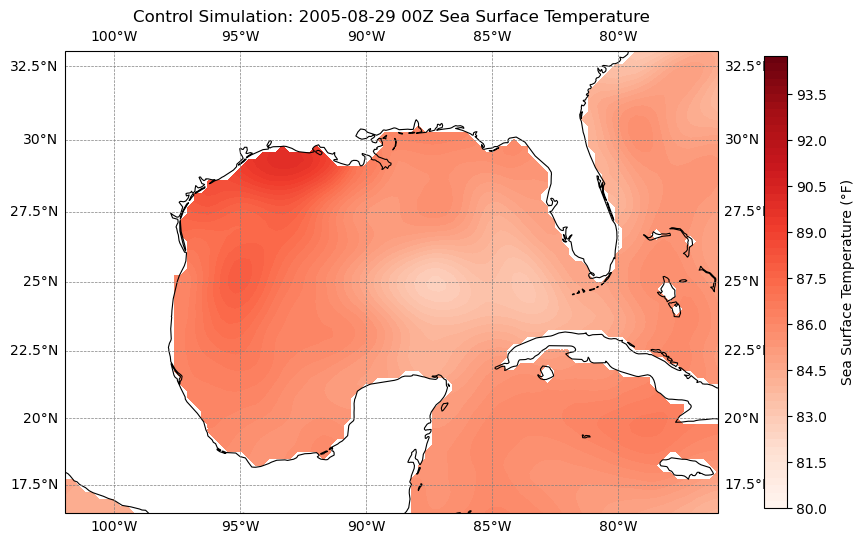

In [3]:
# Get TSK (surface skin temperature)
sst_ctrl = getvar(wrf_ctrl, "TSK", timeidx=8)

# Convert from Kelvin to Fahrenheit
sst_ctrl_f = (sst_ctrl - 273.15) * 9/5 + 32

# Get the land mask (1 = land, 0 = water)
landmask = getvar(wrf_ctrl, "LANDMASK")

# Mask land areas (set to NaN where landmask == 1)
sst_ocean_f = sst_ctrl_f.where(landmask == 0)

# Print diagnostics
pmin = np.nanmin(sst_ocean_f)
pmax = np.nanmax(sst_ocean_f)
print(f"Min SST over ocean: {pmin:.2f} °F, Max SST over ocean: {pmax:.2f} °F")

# Get lat/lon and projection
lats, lons = latlon_coords(sst_ctrl)
cart_proj = get_cartopy(sst_ctrl)

# Plotting
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)

# Add coastlines
ax.coastlines('50m', linewidth=0.8)

# Define levels in °F with integer values (rounded explicitly)
levels = np.arange(80, 95, 0.25)  # Create array from 80 to 90 with step size of 1

# Only filled contours (no contour lines)
cf = ax.contourf(to_np(lons), to_np(lats), to_np(sst_ocean_f),
                 levels=levels, cmap="Reds", transform=crs.PlateCarree())

# Colorbar
cbar = plt.colorbar(cf, ax=ax, shrink=0.98)
cbar.set_label("Sea Surface Temperature (°F)", labelpad=10)

# Map bounds and gridlines
ax.set_xlim(cartopy_xlim(sst_ctrl))
ax.set_ylim(cartopy_ylim(sst_ctrl))
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')

# Title
plt.title("Control Simulation: 2005-08-29 00Z Sea Surface Temperature")
plt.show()


Min SST over ocean: 86.27 °F, Max SST over ocean: 93.49 °F


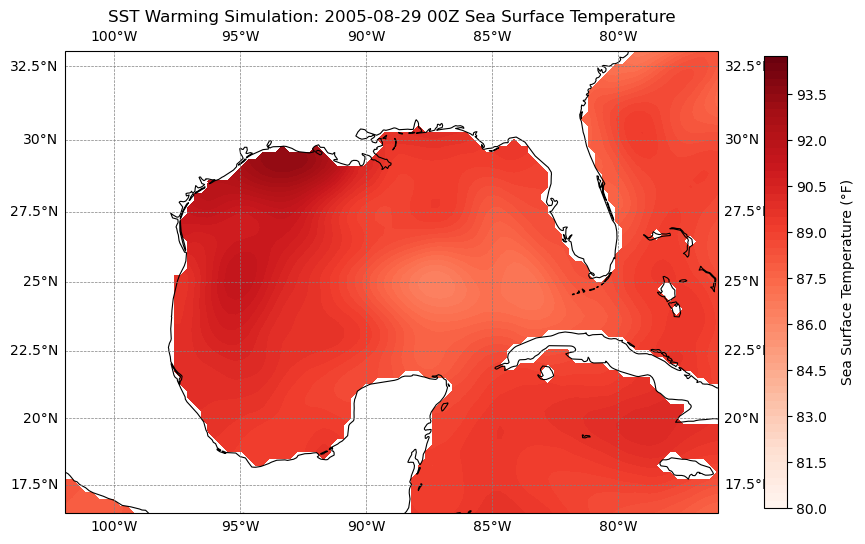

In [4]:
# Get TSK (surface skin temperature)
sst_warm = getvar(wrf_sst, "TSK", timeidx=8)

# Convert from Kelvin to Fahrenheit
sst_warm_f = (sst_warm - 273.15) * 9/5 + 32

# Get the land mask (1 = land, 0 = water)
landmask = getvar(wrf_sst, "LANDMASK")

# Mask land areas (set to NaN where landmask == 1)
sst_warm_ocean_f = sst_warm_f.where(landmask == 0)

# Print diagnostics
pmin = np.nanmin(sst_warm_ocean_f)
pmax = np.nanmax(sst_warm_ocean_f)
print(f"Min SST over ocean: {pmin:.2f} °F, Max SST over ocean: {pmax:.2f} °F")

# Get lat/lon and projection
lats, lons = latlon_coords(sst_warm)
cart_proj = get_cartopy(sst_warm)

# Plotting
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)

# Add coastlines
ax.coastlines('50m', linewidth=0.8)

# Define levels in °F with integer values (rounded explicitly)
levels = np.arange(80, 95, 0.25)  # Create array from 80 to 90 with step size of 1

# Only filled contours (no contour lines)
cf = ax.contourf(to_np(lons), to_np(lats), to_np(sst_warm_ocean_f),
                 levels=levels, cmap="Reds", transform=crs.PlateCarree())

# Colorbar
cbar = plt.colorbar(cf, ax=ax, shrink=0.98)
cbar.set_label("Sea Surface Temperature (°F)", labelpad=10)

# Map bounds and gridlines
ax.set_xlim(cartopy_xlim(sst_warm))
ax.set_ylim(cartopy_ylim(sst_warm))
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')

# Title
plt.title("SST Warming Simulation: 2005-08-29 00Z Sea Surface Temperature")
plt.show()

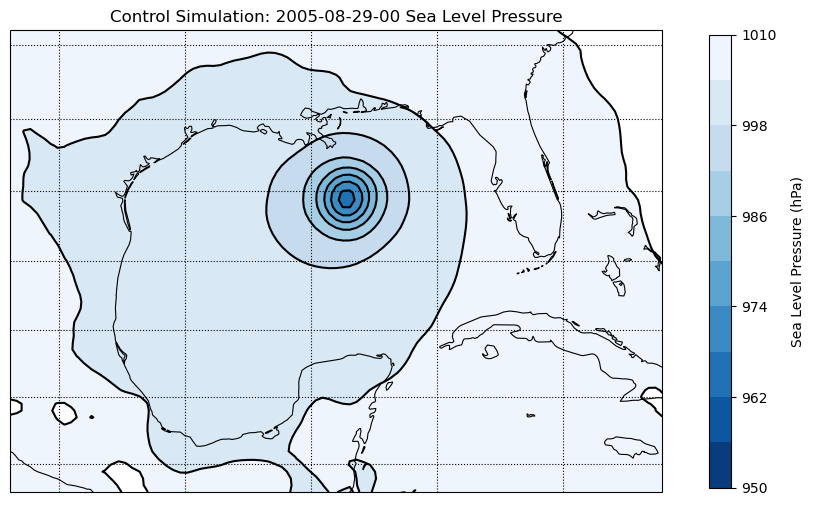

<xarray.DataArray 'smooth_slp' ()>
array(965.48156738)
Coordinates:
    XTIME    float32 1.44e+03
    Time     datetime64[ns] 2005-08-29


In [5]:
# Plot sea level pressure for the last time slice in the file
# Get the sea level pressure at the last time slice in 
# the file (there are 9 time slices, so 8 is the last one)
# slp is not output by WRF, but is rather computed by the 
# WRF python package
slp = getvar(wrf_ctrl, "slp", timeidx=8)

# Print the minimum pressure 
pmin = np.min(slp)

# Smooth the sea level pressure since it tends to be noisy 
# you don't have to do this - you could just plot slp
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
# we have to use the original coordinates that
# are attached to slp in order to plot
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

# Create a figure
fig = plt.figure(figsize=(12, 6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

ax.coastlines('50m', linewidth=0.8)

# Define contour levels from 950 to 1010 hPa
levels = np.linspace(950, 1010, 11)  # 7 levels between 950 and 1010

# Make the contour outlines and filled contours for the smoothed sea level pressure.
contour = plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), levels, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), levels,
             transform=crs.PlateCarree(),
             cmap="Blues_r")

# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.98)

cbar.set_label(label = "Sea Level Pressure (hPa)", labelpad = 10)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Control Simulation: 2005-08-29-00 Sea Level Pressure")

plt.show()

print(np.min(smooth_slp))

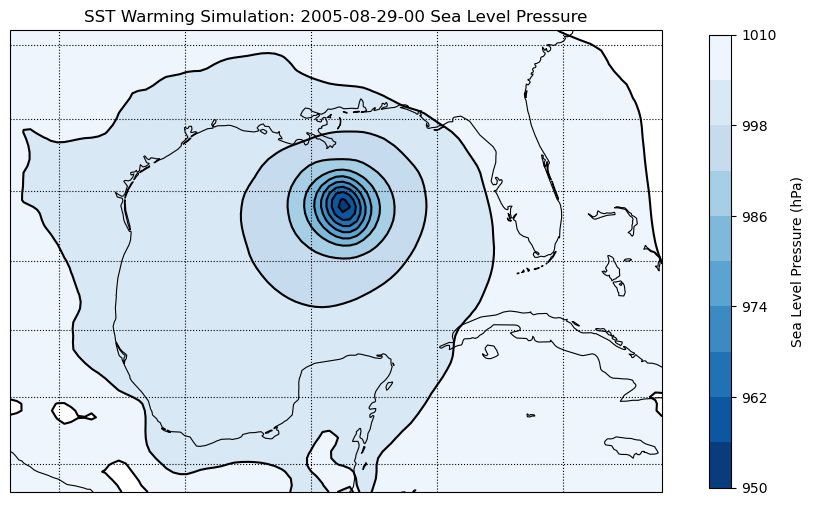

<xarray.DataArray 'smooth_slp' ()>
array(953.74523926)
Coordinates:
    XTIME    float32 1.44e+03
    Time     datetime64[ns] 2005-08-29


In [6]:
# Plot sea level pressure for the last time slice in the file
# Get the sea level pressure at the last time slice in 
# the file (there are 9 time slices, so 8 is the last one)
# slp is not output by WRF, but is rather computed by the 
# WRF python package
wrf_sst_slp = getvar(wrf_sst, "slp", timeidx=8)

# Print the minimum pressure 
pmin = np.min(wrf_sst_slp)

# Smooth the sea level pressure since it tends to be noisy 
# you don't have to do this - you could just plot slp
smooth_slp = smooth2d(wrf_sst_slp, 3, cenweight=4)

# Get the latitude and longitude points
# we have to use the original coordinates that
# are attached to slp in order to plot
lats, lons = latlon_coords(wrf_sst_slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(wrf_sst_slp)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

ax.coastlines('50m', linewidth=0.8)

# Define contour levels from 950 to 1010
levels = np.linspace(950, 1010, 11)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
contour = plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), levels, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), levels,
             transform=crs.PlateCarree(),
             cmap = "Blues_r")

# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.98)

cbar.set_label(label = "Sea Level Pressure (hPa)", labelpad = 10)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("SST Warming Simulation: 2005-08-29-00 Sea Level Pressure")

plt.show()

print(np.min(smooth_slp))

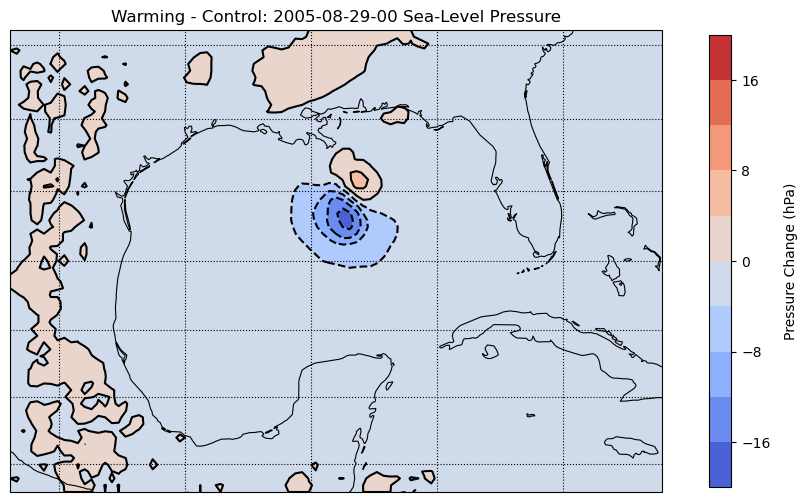

<xarray.DataArray 'slp' ()>
array(-17.55627441)
Coordinates:
    XTIME    float32 1.44e+03
    Time     datetime64[ns] 2005-08-29


In [7]:
# Plot sea level pressure for the last time slice in the file
# Get the sea level pressure at the last time slice in 
# the file (there are 9 time slices, so 8 is the last one)
# slp is not output by WRF, but is rather computed by the 
# WRF python package
slp_sst = getvar(wrf_sst, "slp", timeidx = 8)
diff = slp_sst - slp

# Print the minimum pressure 
# pmin = np.min(slp)

# Get the latitude and longitude points
# we have to use the original coordinates that
# are attached to slp in order to plot
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

ax.coastlines('50m', linewidth=0.8)

# Define contour levels from -20 to 20
levels = np.linspace(-20, 20, 11)

# Make the contour outlines and filled contours for the sea level pressure change
contour = plt.contour(to_np(lons), to_np(lats), to_np(diff), levels, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(diff), levels,
             transform=crs.PlateCarree(),
             cmap="coolwarm")

# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.98)

cbar.set_label(label = "Pressure Change (hPa)", labelpad = 10)

# Set the map bounds
ax.set_xlim(cartopy_xlim(slp))
ax.set_ylim(cartopy_ylim(slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Warming - Control: 2005-08-29-00 Sea-Level Pressure")

plt.show()

print(np.min(diff))

Now let's plot precipitation. To do this, we have to add RAINC and RAINNC together. Also remember that precipitation accumulates throughout the simulation, so when we plot precipitation at time index 8, we are plotting one day (August 28th-29th) of accumulated precipitation. The unit
of the precipitation variables is mm, so this would make the units in this plot mm/day.

Max precipitation (mm): <xarray.DataArray ()>
array(352.53240967)


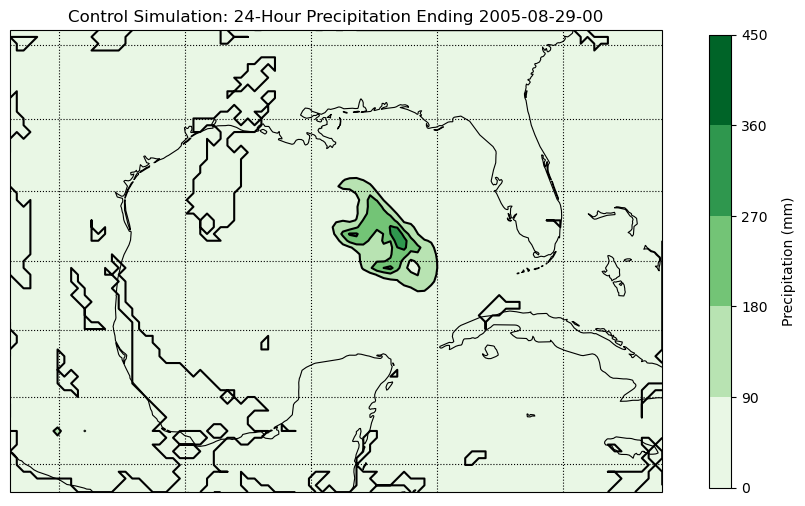

In [23]:
# Get accumulated cumulus and grid-scale precipitation at start and end of the interval
rainc_start = getvar(wrf_ctrl, "RAINC", timeidx=0)
rainnc_start = getvar(wrf_ctrl, "RAINNC", timeidx=0)

rainc_end = getvar(wrf_ctrl, "RAINC", timeidx=8)
rainnc_end = getvar(wrf_ctrl, "RAINNC", timeidx=8)

# Calculate total accumulated precipitation over the interval (e.g., 24 hours)
precip_total = (rainc_end + rainnc_end) - (rainc_start + rainnc_start)

# Print the maximum precipitation value
print("Max precipitation (mm):", np.max(precip_total))

# Get latitude and longitude coordinates
lats, lons = latlon_coords(rainc_end)

# Get the cartopy map projection from the WRF data
cart_proj = get_cartopy(rainc_end)

# Create the figure and set the projection
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)

# Add coastlines to the map
ax.coastlines('50m', linewidth=0.8)

# Define contour levels for precipitation from 0 to 450 mm
levels = np.linspace(0, 450, 6)

# Plot contour lines and filled contours for total precipitation
plt.contour(to_np(lons), to_np(lats), to_np(precip_total), levels, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(precip_total), levels,
             transform=crs.PlateCarree(), cmap="Greens")

# Add colorbar and label
cbar = plt.colorbar(ax=ax, shrink=0.98)
cbar.set_label("Precipitation (mm)", labelpad=10)

# Set map bounds based on data extent
ax.set_xlim(cartopy_xlim(rainc_end))
ax.set_ylim(cartopy_ylim(rainc_end))

# Add gridlines to the map
ax.gridlines(color="black", linestyle="dotted")

# Add a title
plt.title("Control Simulation: 24-Hour Precipitation Ending 2005-08-29-00")

# Show the plot
plt.show()


Max precipitation (mm): <xarray.DataArray ()>
array(441.15185547)


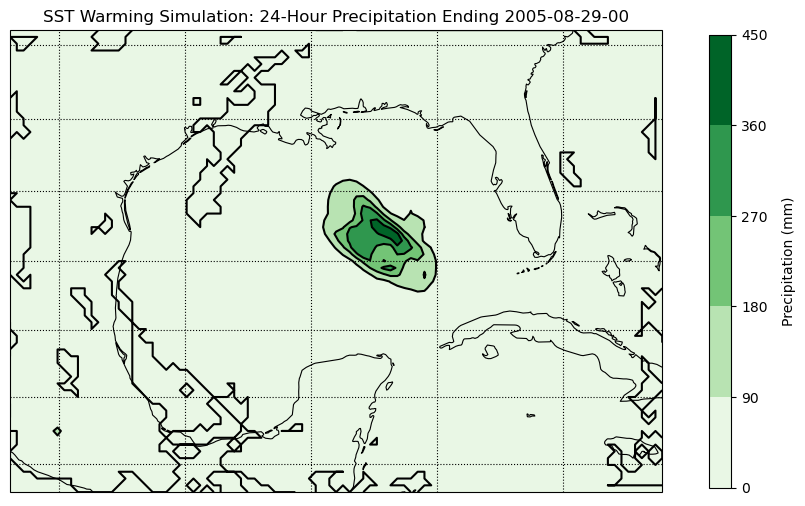

In [24]:
# Get accumulated cumulus and grid-scale precipitation at start and end of the interval
sst_rain_start = getvar(wrf_sst, "RAINC", timeidx=0)
sst_rainnc_start = getvar(wrf_sst, "RAINNC", timeidx=0)

sst_rain_end = getvar(wrf_sst, "RAINC", timeidx=8)
sst_rainnc_end = getvar(wrf_sst, "RAINNC", timeidx=8)

# Calculate total accumulated precipitation over the interval (e.g., 24 hours)
wrf_sst_precip = (sst_rain_end + sst_rainnc_end) - (sst_rain_start + sst_rainnc_start)

# Print the maximum precipitation value
print("Max precipitation (mm):", np.max(wrf_sst_precip))

# Get the latitude and longitude points
lats, lons = latlon_coords(sst_rain_end)

# Get the cartopy projection from the WRF data
cart_proj = get_cartopy(sst_rain_end)

# Create a figure
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)

# Add coastlines to the map
ax.coastlines('50m', linewidth=0.8)

# Define contour levels from 0 to 450 mm
levels = np.linspace(0, 450, 6)

# Plot contour lines and filled contours for total precipitation
plt.contour(to_np(lons), to_np(lats), to_np(wrf_sst_precip), levels, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(wrf_sst_precip), levels,
             transform=crs.PlateCarree(), cmap="Greens")

# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=0.98)
cbar.set_label("Precipitation (mm)", labelpad=10)

# Set the map bounds based on data extent
ax.set_xlim(cartopy_xlim(sst_rain_end))
ax.set_ylim(cartopy_ylim(sst_rain_end))

# Add gridlines
ax.gridlines(color="black", linestyle="dotted")

# Add a title
plt.title("SST Warming Simulation: 24-Hour Precipitation Ending 2005-08-29-00")

# Show the plot
plt.show()


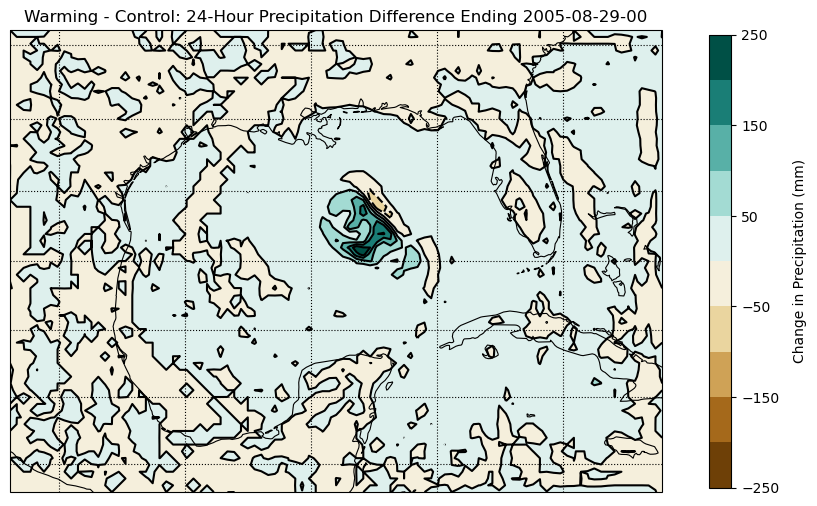

<xarray.DataArray ()>
array(238.9768219)


In [67]:
# Difference in precipitation between SST and control runs
precip_diff = wrf_sst_precip - base_precip

# Get the lat/lon coordinates from control run
lats, lons = latlon_coords(base_rain_end)

# Get the Cartopy projection
cart_proj = get_cartopy(base_rain_end)

# Create the figure
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)

# Add coastlines
ax.coastlines('50m', linewidth=0.8)

# Define color levels for difference plot

levels = np.linspace(-250, 250, 11)

# Make the contour outlines and filled contours for the difference
plt.contour(to_np(lons), to_np(lats), to_np(precip_diff), levels, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(precip_diff), levels,
             transform=crs.PlateCarree(), cmap="BrBG")

# Add a colorbar
cbar = plt.colorbar(ax=ax, shrink=0.98)
cbar.set_ticks(np.linspace(v_min, v_max, 6))
cbar.set_label(label="Change in Precipitation (mm)", labelpad=10)

# Set map bounds
ax.set_xlim(cartopy_xlim(base_rain_end))
ax.set_ylim(cartopy_ylim(base_rain_end))

# Add gridlines
ax.gridlines(color="black", linestyle="dotted")

# Add title
plt.title("Warming - Control: 24-Hour Precipitation Difference Ending 2005-08-29-00")

# Show the plot
plt.show()

print(np.max(precip_diff))

Your turn! Try computing and plotting wind speed at the last time slice in the file using the 10 meter level U and V winds. The variable names in wrfout are U10 and V10. Change the color scheme - you can find matplotlib colormaps at https://matplotlib.org/stable/users/explain/colors/colormaps.html

<xarray.DataArray ()>
array(74.94804382)
Coordinates:
    XTIME    float32 1.44e+03
    Time     datetime64[ns] 2005-08-29


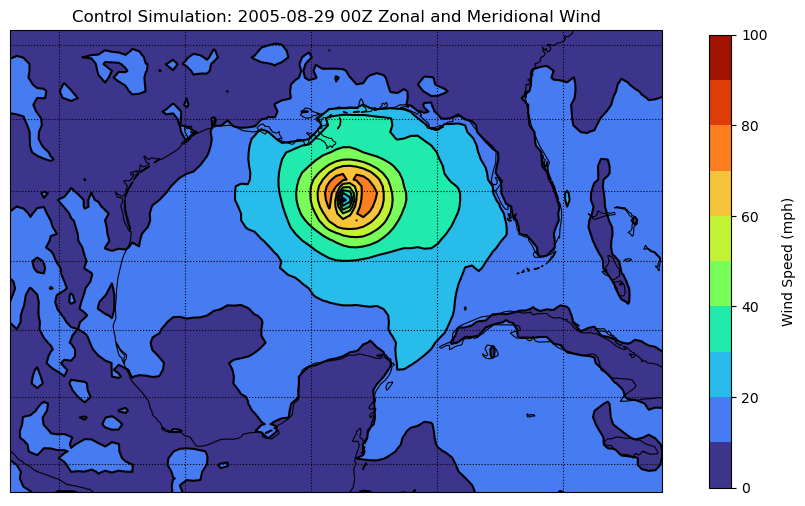

In [71]:
# Get U and V wind components at 10 meters (U10, V10)
u_base_wnd = getvar(wrf_ctrl, "U10", timeidx=8)
v_base_wnd = getvar(wrf_ctrl, "V10", timeidx=8)

# Calculate wind speed (magnitude)
wind = np.sqrt(u_base_wnd ** 2 + v_base_wnd ** 2)

# Convert wind speed from m/s to mph
wind_mph = wind * 2.23694

print(np.max(wind_mph))

# Create a figure
fig = plt.figure(figsize=(12, 6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

ax.coastlines('50m', linewidth=0.8)

# Use np.linspace to create contour levels from 0 to 40
levels = np.linspace(0, 100, 11)  # Adjusted levels for mph (0 to 100 mph)

# Make the contour outlines and filled contours for wind magnitude
contour = plt.contour(to_np(lons), to_np(lats), to_np(wind_mph), levels, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(wind_mph), levels,
             transform=crs.PlateCarree(),
             cmap="turbo")

# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.98)

cbar.set_label("Wind Speed (mph)", labelpad=10)

# Set the map bounds
ax.set_xlim(cartopy_xlim(u_base_wnd))
ax.set_ylim(cartopy_ylim(u_base_wnd))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Control Simulation: 2005-08-29 00Z Zonal and Meridional Wind")

plt.show()

<xarray.DataArray ()>
array(94.6329422)
Coordinates:
    XTIME    float32 1.44e+03
    Time     datetime64[ns] 2005-08-29


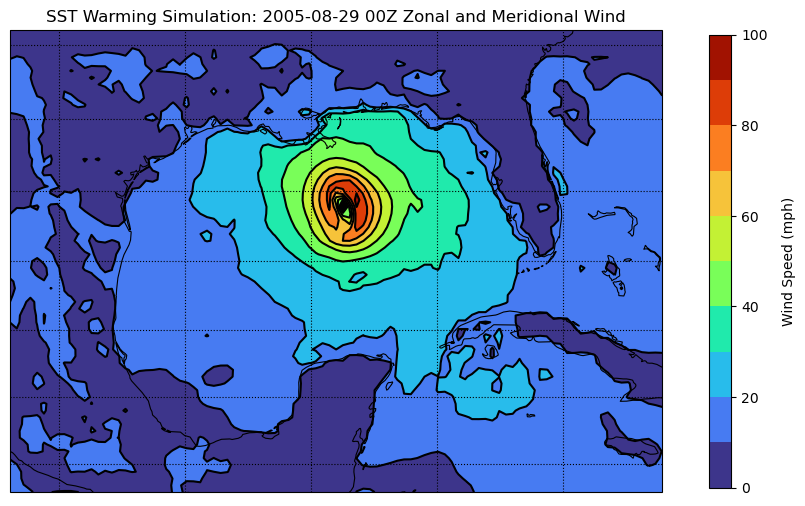

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as crs
from wrf import getvar, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim

# Get U and V wind components at 10 meters (U10, V10)
u_sst_wnd = getvar(wrf_sst, "U10", timeidx=8)
v_sst_wnd = getvar(wrf_sst, "V10", timeidx=8)

# Calculate wind speed (magnitude)
sst_wind = np.sqrt(u_sst_wnd ** 2 + v_sst_wnd ** 2)

# Convert wind speed from m/s to mph
sst_wind_mph = sst_wind * 2.23694

print(np.max(sst_wind_mph))

# Create a figure
fig = plt.figure(figsize=(12, 6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

ax.coastlines('50m', linewidth=0.8)

# Use np.linspace to create contour levels from 0 to 100 for wind magnitude in mph
levels = np.linspace(0, 100, 11)  # Adjusted levels for mph (0 to 100 mph)

# Make the contour outlines and filled contours for wind magnitude in mph
contour = plt.contour(to_np(lons), to_np(lats), to_np(sst_wind_mph), levels, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(sst_wind_mph), levels,
             transform=crs.PlateCarree(),
             cmap="turbo")

# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.98)

cbar.set_label("Wind Speed (mph)", labelpad=10)

# Set the map bounds
ax.set_xlim(cartopy_xlim(u_sst_wnd))
ax.set_ylim(cartopy_ylim(u_sst_wnd))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("SST Warming Simulation: 2005-08-29 00Z Zonal and Meridional Wind")

plt.show()


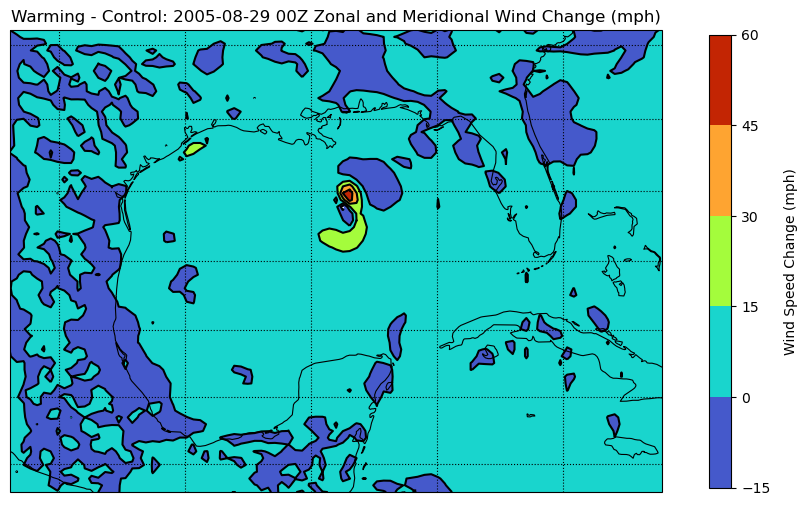

<xarray.DataArray ()>
array(54.11515427)
Coordinates:
    XTIME    float32 1.44e+03
    Time     datetime64[ns] 2005-08-29


In [68]:
# Calculate wind speed difference (m/s)
wind_diff = sst_wind_mph - wind_mph

lats, lons = latlon_coords(wind_diff)

# Get the cartopy mapping object
cart_proj = get_cartopy(u_base_wnd)

# Create a figure
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)

ax.coastlines('50m', linewidth=0.8)

# Define levels from -50 to 50 mph
levels = np.linspace(-15, 60, 6)
# Plot contour lines
contour = plt.contour(to_np(lons), to_np(lats), to_np(wind_diff), levels, colors="black",
                      transform=crs.PlateCarree())

# Plot filled contours using the new colormap
plt.contourf(to_np(lons), to_np(lats), to_np(wind_diff), levels,
             transform=crs.PlateCarree(),
             cmap="turbo")

# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.98)
cbar.set_label("Wind Speed Change (mph)", labelpad=10)

# Set map bounds and gridlines
ax.set_xlim(cartopy_xlim(u_base_wnd))
ax.set_ylim(cartopy_ylim(u_base_wnd))
ax.gridlines(color="black", linestyle="dotted")

plt.title("Warming - Control: 2005-08-29 00Z Zonal and Meridional Wind Change (mph)")

plt.show()

print(np.max(wind_diff))

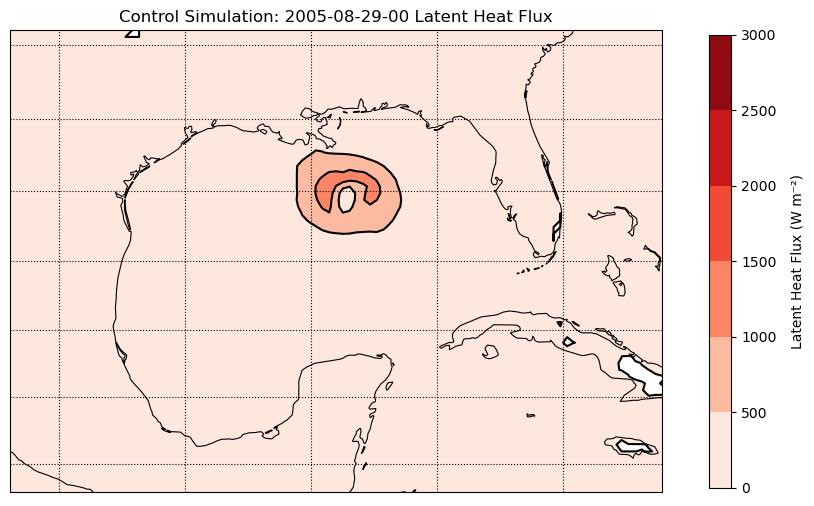

<xarray.DataArray 'LH' ()>
array(1221.65100098)
Coordinates:
    XTIME    float32 1.44e+03
    Time     datetime64[ns] 2005-08-29


In [52]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as crs
from matplotlib.ticker import FormatStrFormatter

# Get the latent heat flux from the control simulation (base_latent_flux)
base_latent_flux = getvar(wrf_ctrl, "LH", timeidx=8)

lats, lons = latlon_coords(base_latent_flux)

# Get the cartopy projection object
cart_proj = get_cartopy(base_latent_flux)

# Create the figure
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)

# Add coastlines
ax.coastlines('50m', linewidth=0.8)

# Define the range for vmin and vmax
vmin = 0  # Set the lower bound for the color scale
vmax = 3000  # Set the upper bound for the color scale

# Create contour levels to match the color range
levels = np.linspace(vmin, vmax, 7)  # 10 levels between 0 and 2500

# Plot contours and filled contours using the seismic colormap
contour = ax.contour(to_np(lons), to_np(lats), to_np(base_latent_flux), levels, colors="black", transform=crs.PlateCarree())
cf = ax.contourf(to_np(lons), to_np(lats), to_np(base_latent_flux), levels, transform=crs.PlateCarree(), cmap="Reds", vmin=vmin, vmax=vmax)

# Add a color bar with formatted tick labels
cbar = plt.colorbar(cf, ax=ax, shrink=0.98)
cbar.set_label(label="Latent Heat Flux (W m⁻²)", labelpad = 10)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Set map bounds
ax.set_xlim(cartopy_xlim(base_latent_flux))
ax.set_ylim(cartopy_ylim(base_latent_flux))

# Add gridlines
ax.gridlines(color="black", linestyle="dotted")

# Add a title
plt.title("Control Simulation: 2005-08-29-00 Latent Heat Flux")

# Show the plot
plt.show()

print(np.max(base_latent_flux))


<xarray.DataArray 'LH' ()>
array(2679.21411133)
Coordinates:
    XTIME    float32 1.44e+03
    Time     datetime64[ns] 2005-08-29


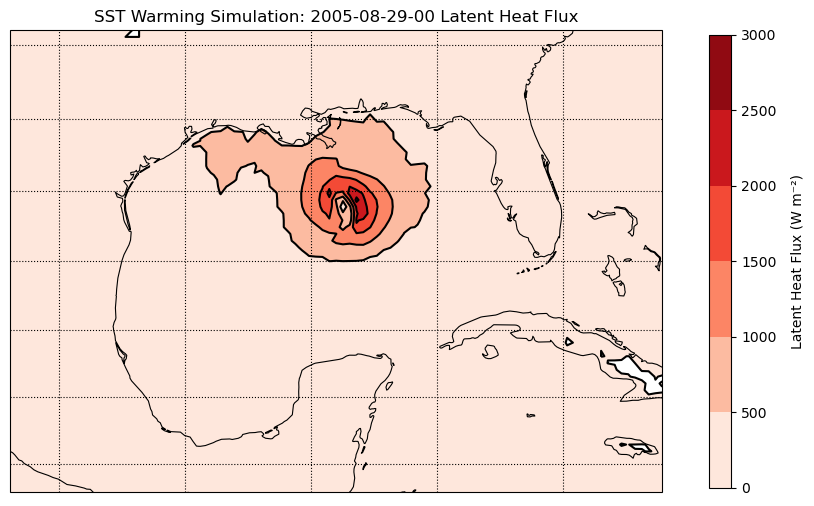

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as crs
from matplotlib.ticker import FormatStrFormatter

# Get the latent heat flux from the warm simulation (sst_latent_flux)
sst_latent_flux = getvar(wrf_sst, "LH", timeidx=8)

lats, lons = latlon_coords(sst_latent_flux)

# Get the cartopy projection object
cart_proj = get_cartopy(sst_latent_flux)

# Create the figure
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)

# Add coastlines
ax.coastlines('50m', linewidth=0.8)

# Define the range for vmin and vmax
vmin = 0  # Set the lower bound for the color scale
vmax = 3000  # Set the upper bound for the color scale

# Create contour levels to match the color range
levels = np.linspace(vmin, vmax, 7)  # 10 levels between 0 and 2500

# Plot contours and filled contours using the seismic colormap
contour = ax.contour(to_np(lons), to_np(lats), to_np(sst_latent_flux), levels, colors="black", transform=crs.PlateCarree())
cf = ax.contourf(to_np(lons), to_np(lats), to_np(sst_latent_flux), levels, transform=crs.PlateCarree(), cmap="Reds", vmin=vmin, vmax=vmax)

# Add a color bar with formatted tick labels
cbar = plt.colorbar(cf, ax=ax, shrink=0.98)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
cbar.set_label(label="Latent Heat Flux (W m⁻²)", labelpad = 10)

# Set map bounds
ax.set_xlim(cartopy_xlim(sst_latent_flux))
ax.set_ylim(cartopy_ylim(sst_latent_flux))

# Add gridlines
ax.gridlines(color="black", linestyle="dotted")

# Add a title
plt.title("SST Warming Simulation: 2005-08-29-00 Latent Heat Flux")

print(np.max(sst_latent_flux))

# Show the plot
plt.show()


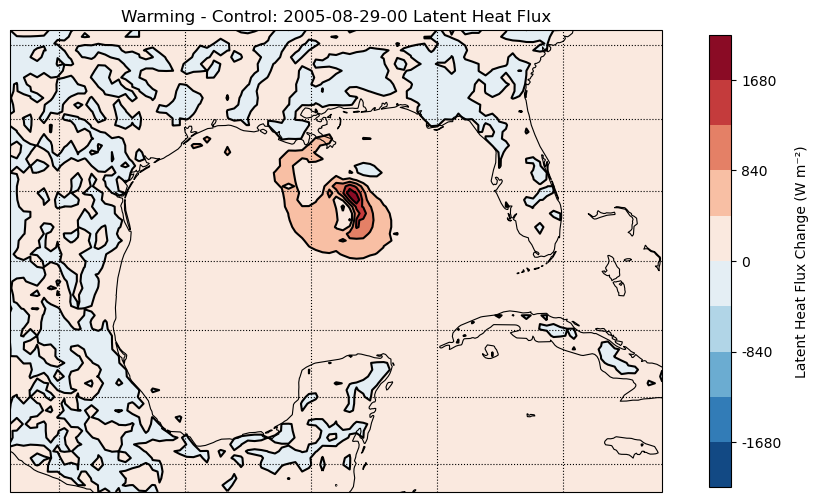

In [66]:
# Get accumulated total cumulus precip and accumulated total grid scale precip
# since the unit is mm and the precip accumulated over a day, the 
# unit is mm/day. 

diff_LH_flux = sst_latent_flux - base_latent_flux
base_latent_flux = getvar(wrf_ctrl, "LH", timeidx=8)

lats, lons = latlon_coords(diff_LH_flux)
cart_proj = get_cartopy(base_latent_flux)

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)
ax.coastlines('50m', linewidth=0.8)

vmax = 2100
vmin = -2100
levels = np.linspace(vmin, vmax, 11)

contour = ax.contour(to_np(lons), to_np(lats), to_np(diff_LH_flux), levels, colors="black", transform=crs.PlateCarree())
cf = ax.contourf(to_np(lons), to_np(lats), to_np(diff_LH_flux),
                 levels=levels, cmap="RdBu_r", vmin=vmin, vmax=vmax,
                 transform=crs.PlateCarree())

cbar = plt.colorbar(cf, ax=ax, shrink=0.98)
cbar.set_label("Latent Heat Flux Change (W m⁻²)", labelpad=10)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax.set_xlim(cartopy_xlim(base_latent_flux))
ax.set_ylim(cartopy_ylim(base_latent_flux))
ax.gridlines(color="black", linestyle="dotted")
plt.title("Warming - Control: 2005-08-29-00 Latent Heat Flux")
plt.show()


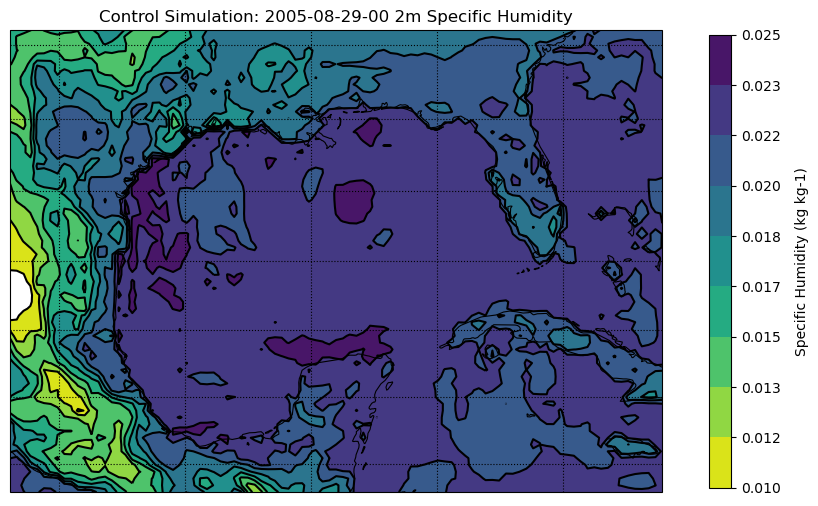

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import cartopy.crs as crs
import numpy as np

# Extract the 2-meter specific humidity
base_qv = getvar(wrf_ctrl, "Q2", timeidx=8)

# Get lat/lon and projection
lats, lons = latlon_coords(base_qv)
cart_proj = get_cartopy(base_qv)

# Define color range and fewer levels
vmin = 0.010
vmax = 0.025
levels = np.linspace(vmin, vmax, 10)  # fewer levels for stronger contrast

# Create figure and map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)
ax.coastlines('50m', linewidth=0.8)

# Plot contours and filled contours
contour = ax.contour(to_np(lons), to_np(lats), to_np(base_qv), levels, colors="black",
                     transform=crs.PlateCarree())
cf = ax.contourf(to_np(lons), to_np(lats), to_np(base_qv), levels, 
                 transform=crs.PlateCarree(), cmap="viridis_r", vmin=vmin, vmax=vmax)

# Color bar with formatted tick labels
cbar = plt.colorbar(cf, ax=ax, shrink=0.98)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
cbar.set_label("Specific Humidity (kg kg-1)", labelpad = 10)

# Map extent, gridlines, title
ax.set_xlim(cartopy_xlim(base_qv))
ax.set_ylim(cartopy_ylim(base_qv))
ax.gridlines(color="black", linestyle="dotted")
plt.title("Control Simulation: 2005-08-29-00 2m Specific Humidity")

# Show plot
plt.show()



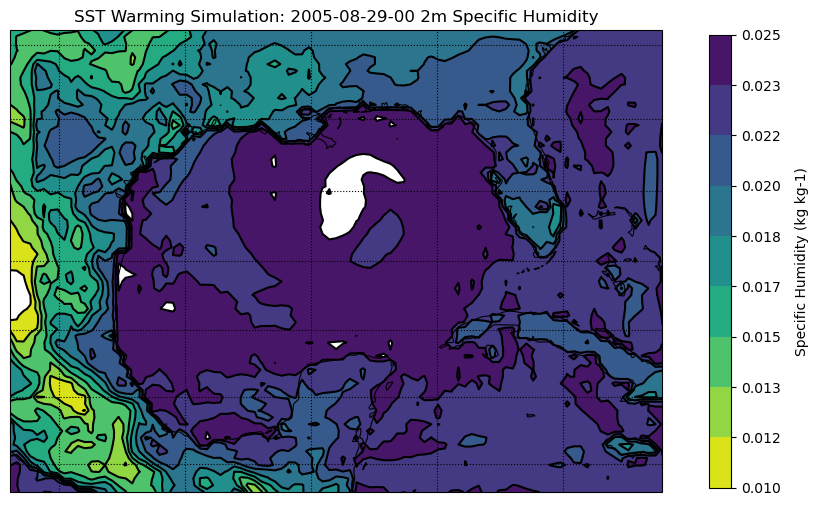

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import cartopy.crs as crs
import numpy as np

# Extract the 2-meter specific humidity from the warm simulation
sst_qv = getvar(wrf_sst, "Q2", timeidx=8)

# Get lat/lon and projection
lats, lons = latlon_coords(sst_qv)
cart_proj = get_cartopy(sst_qv)

# Define consistent color range and fewer levels for better contrast
vmin = 0.010
vmax = 0.025
levels = np.linspace(vmin, vmax, 10)  # Fewer levels

# Create figure and map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)
ax.coastlines('50m', linewidth=0.8)

# Plot contours and filled contours
contour = ax.contour(to_np(lons), to_np(lats), to_np(sst_qv), levels, colors="black",
                     transform=crs.PlateCarree())
cf = ax.contourf(to_np(lons), to_np(lats), to_np(sst_qv), levels, 
                 transform=crs.PlateCarree(), cmap="viridis_r", vmin=vmin, vmax=vmax)

# Color bar with formatted tick labels
cbar = plt.colorbar(cf, ax=ax, shrink=0.98)
cbar.set_label(label = "Specific Humidity (kg kg-1)", labelpad = 10)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

# Set map extent and gridlines
ax.set_xlim(cartopy_xlim(sst_qv))
ax.set_ylim(cartopy_ylim(sst_qv))
ax.gridlines(color="black", linestyle="dotted")

# Add title
plt.title("SST Warming Simulation: 2005-08-29-00 2m Specific Humidity")

# Show the plot
plt.show()


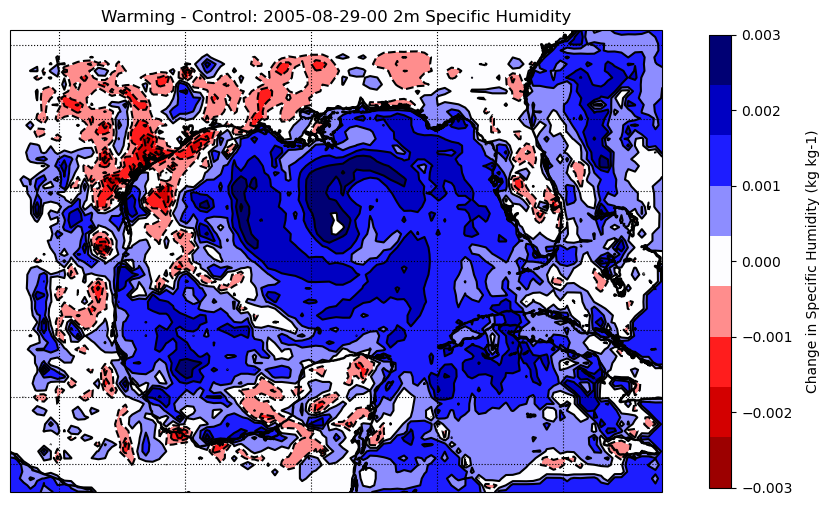

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as crs

# Define the min and max values for the color range
vmin = -0.0030
vmax = 0.0030

# Extract the 2-meter potential temperature
base_qv = getvar(wrf_ctrl, "Q2", timeidx=8)

# Calculate the difference
diff_qv = sst_qv - base_qv

# Get latitude and longitude
lats, lons = latlon_coords(base_qv)

# Get the cartopy projection
cart_proj = get_cartopy(base_qv)

# Create a figure
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=cart_proj)

# Add coastlines with enhanced visibility
ax.coastlines(resolution='10m', linewidth=1.75, color='black')  # Higher resolution and thicker lines

# Create the contour plot with specific levels for more detail
levels = np.linspace(vmin, vmax, 10)  # Define levels for contours
contour = ax.contour(to_np(lons), to_np(lats), to_np(diff_qv), levels, colors="black", 
                     transform=crs.PlateCarree())  # Use specific levels for contours

# Plot the filled contours with the same vmin and vmax
cf = ax.contourf(to_np(lons), to_np(lats), to_np(diff_qv), levels, 
                 transform=crs.PlateCarree(), vmin=vmin, vmax=vmax, cmap="seismic_r")

# Add the color bar with specific ticks for your range
# Create ticks manually based on the range of values
num_ticks = 7  # Odd number for symmetry
ticks = np.linspace(vmin, vmax, num_ticks)

# Add the color bar
cbar = plt.colorbar(cf, ax=ax, ticks=ticks, shrink=0.98)

cbar.set_label(label = "Change in Specific Humidity (kg kg-1)", labelpad = 10)

# Set map extent
ax.set_xlim(cartopy_xlim(base_qv))
ax.set_ylim(cartopy_ylim(base_qv))

# Add gridlines
ax.gridlines(color="black", linestyle="dotted")

# Add title
plt.title("Warming - Control: 2005-08-29-00 2m Specific Humidity")

# Show the plot
plt.show()


